Creating the XOR gate's truth table dataset

In [6]:
import numpy as np

# XOR truth table inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 1, 1, 0])  # Outputs


print("Input Data (X):\n", X)
print("Output Data (y):\n", y)

Input Data (X):
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Output Data (y):
 [0 1 1 0]


 Implementing the Single Layer Perceptron using MCP Neuron

 Since XOR is not linearly separable, a single layer perceptron will fail to classify the XOR gate correctly.

In [7]:
class Perceptron:
    def __init__(self, input_size, lr=0.1):
        self.weights = np.zeros(input_size + 1)  # +1 for bias term
        self.lr = lr

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Weighted sum of inputs + bias (weights[-1] is the bias)
        z = np.dot(x, self.weights[:-1]) + self.weights[-1]
        return self.activation_fn(z)

    def train(self, X, y, epochs=10):
        for _ in range(epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                # Update weights
                self.weights[:-1] += self.lr * (label - prediction) * inputs
                self.weights[-1] += self.lr * (label - prediction)  # Bias update


# Initialize Perceptron and train it on XOR dataset
perceptron = Perceptron(input_size=2)
perceptron.train(X, y, epochs=10)

# Test perceptron on XOR dataset
for inputs in X:
    print(f"Input: {inputs}, Prediction: {perceptron.predict(inputs)}")

Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0


 Visualize the Single Layer Perceptron's Decision Boundary

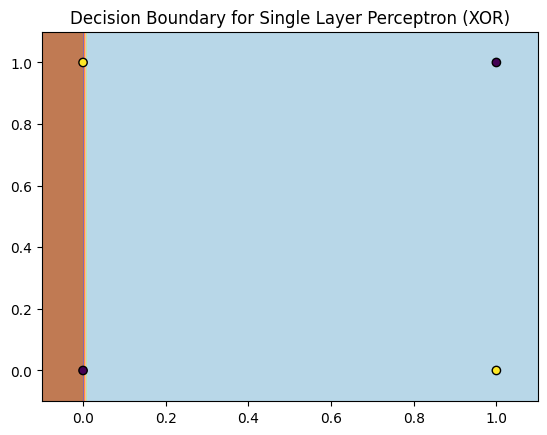

In [8]:
import matplotlib.pyplot as plt


def plot_decision_boundary(X, model, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = np.array(
        [model.predict(np.array([x1, x2])) for x1, x2 in zip(xx.ravel(), yy.ravel())]
    )
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", marker="o")
    plt.title(title)
    plt.show()


# Visualize decision boundary for the Single Layer Perceptron
plot_decision_boundary(
    X, perceptron, "Decision Boundary for Single Layer Perceptron (XOR)"
)

# Observing the Perceptron's Performance

When running the SLP code, you will notice that the perceptron struggles to classify the XOR gate correctly. Since XOR is not linearly separable, the SLP fails to find a decision boundary that can separate the input points of the XOR dataset. You might see inconsistent or inaccurate predictions despite training over multiple epochs.

This confirms the theoretical limitation of SLPs for problems like XOR, where the data points cannot be separated by a straight line in a 2D space.

 Implementing XOR using Multi-Layer Perceptron (MLP)
 

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Input

# XOR truth table inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 1, 1, 0])  # Outputs

# Print the XOR truth table
print("XOR Truth Table:")
print(f"Input A  |  Input B  |  Output")
for i, (input_pair, output) in enumerate(zip(X, y)):
    print(f"  {input_pair[0]}      |    {input_pair[1]}    |    {output}")

# Create the MLP model
mlp = Sequential()
mlp.add(Input(shape=(2,)))  # Explicit input layer
mlp.add(Dense(units=2, activation="relu"))  # Hidden layer with 2 neurons
mlp.add(Dense(units=1, activation="sigmoid"))  # Output layer

# Compile the model
mlp.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = mlp.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
loss, accuracy = mlp.evaluate(X, y)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Test MLP on XOR dataset
print("\nMLP Predictions on XOR Dataset:")
for inputs in X:
    prediction = mlp.predict(np.expand_dims(inputs, axis=0))
    print(f"Input: {inputs}, Prediction: {prediction[0][0]:.4f}")

XOR Truth Table:
Input A  |  Input B  |  Output
  0      |    0    |    0
  0      |    1    |    1
  1      |    0    |    1
  1      |    1    |    0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5000 - loss: 0.6815

Model Accuracy: 50.00%

MLP Predictions on XOR Dataset:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Input: [0 0], Prediction: 0.5189
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Input: [0 1], Prediction: 0.5189
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Input: [1 0], Prediction: 0.4766
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Input: [1 1], Prediction: 0.4497


Visualization for MLP 

458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


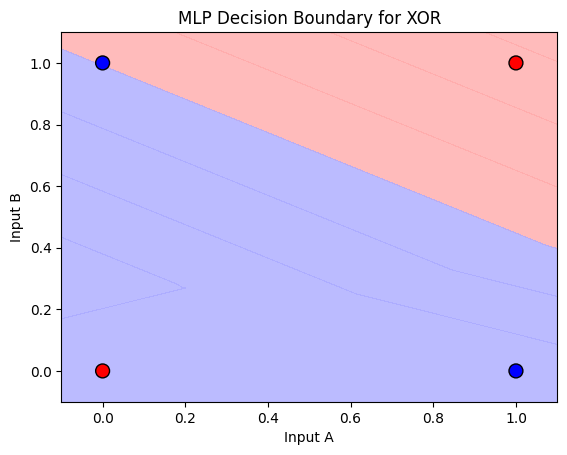

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Visualization of the decision boundary
def plot_decision_boundary(model, X, y):
    # Set the min and max values for the meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict the model's output on the entire grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid).reshape(xx.shape)

    # Create a contour plot for the decision boundary
    plt.contourf(
        xx, yy, predictions, cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]), alpha=0.8
    )

    # Plot the actual points
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=ListedColormap(["#FF0000", "#0000FF"]),
        edgecolors="k",
        s=100,
    )
    plt.title("MLP Decision Boundary for XOR")
    plt.xlabel("Input A")
    plt.ylabel("Input B")
    plt.show()


# Call the function to visualize the decision boundary
plot_decision_boundary(mlp, X, y)